
# Notebook of MI EEG experiment data analysis

## Experiment description

本次运动想象技能赛包含左手运动想象、右手运动想象和双脚运动想象任务3类任务。每组实验包含10个左手运动想象、10个右手运动想象、10个双脚运动想象，随机出现。每次任务的前2s为视频范式引导，被试准备开始运动想象，2s时开始想象并持续至第6s，随后2s为休息和结果反馈，结束后进入下一次任务。参赛选手需在视频引导后的4s内集中注意力进行相应任务的想象。识别结果会在最后2s在屏幕上进行反馈。

其中1,2,3分别为左手、右手、双脚想象任务，对应的第一列数据为开始的时间标记点。
242代表session开始，240代表trial开始，241代表trial结束。

## Analysis & results

In [13]:
import os
import mne
import numpy as np
from pathlib import Path
from omegaconf import OmegaConf
from rich import print, inspect

from data.search_data import RawDataFiles
from data.load_raw_data import LoadRawData

### Parameters

In [27]:
n_jobs = 16
verbose = True

target_experiment_name = 'MI'

event_id_of_interest = ['1', '2', '3']

ch_name_of_interest = ['C3', 'C4', 'CZ']

epochs_kwargs = dict(
    tmin=0.0, # Seconds, negative value refers starting before the epoch onset
    tmax=5.0, # Seconds, positive value refers stopping after the epoch onset
    baseline=(0.0, None), # Perform baseline recenter (tmin, None)
    event_repeated='merge', # It will rename the overlapped epochs
)

filter_kwargs = dict(
    l_freq = 1.0, # Hz
    h_freq = 40.0, # Hz
    n_jobs=n_jobs, # Multiple processing support
    verbose=verbose
)

decim_kwargs = dict(
    decim = 10, # Re-sampling points, adjust for sfreq of EEG data
    verbose=verbose
)

print(f'Using experiment name: "{target_experiment_name}"\n event_id: {event_id_of_interest}\n ch_name_of_interest: {ch_name_of_interest}\n epochs_kwargs: {epochs_kwargs}\n filter_kwargs:{filter_kwargs}\n decim_kwargs: {decim_kwargs}')

Using experiment name: "MI"
 event_id: ['1', '2', '3']
 ch_name_of_interest: ['C3', 'C4', 'CZ']
 epochs_kwargs: {'tmin': 0.0, 'tmax': 5.0, 'baseline': (0.0, None), 'event_repeated': 'merge'}
 filter_kwargs:{'l_freq': 1.0, 'h_freq': 40.0, 'n_jobs': 16, 'verbose': True}
 decim_kwargs: {'decim': 10, 'verbose': True}

### Search file & load data

In [3]:
backend_root = Path(os.path.abspath('.'))
conf = OmegaConf.load(backend_root.joinpath("conf/default.yaml"))
print(f'Using configure: {conf}')

Using configure: {'data_folder': 'd:/脑机接口专项', 'generated_date': '2024-02-21 11:32:24.652030', 'author': 
'default'}

In [4]:

rdf = RawDataFiles(conf.data_folder)
files = [e for e in rdf.find_all() if e['experiment'] == target_experiment_name]
print(f'Found files: {files}')

selected_file_info = files[0]
print(f'Selected file: {selected_file_info}')

2024-02-22 10:47:39.517 | DEBUG    | data.search_data:find_all:97 - Found 21 folders with files.
2024-02-22 10:47:39.520 | DEBUG    | data.search_data:find_all:105 - Found 11 eeg files.


Found files: [{'experiment': 'MI', 'subject': 'S1', 'file_name': 'data.bdf', 'path': 
WindowsPath('d:/脑机接口专项/MI/S1/liuyanbing-S1-20230523-Session1-6block-QLU/data.bdf'), 'unique': 
'MI-S1-liuyanbing-S1-20230523-Session1-6block-QLU-ea71f8cb1deac86b9506889697a72414'}, {'experiment': 'MI', 
'subject': 'S1', 'file_name': 'data.bdf', 'path': 
WindowsPath('d:/脑机接口专项/MI/S1/liuyanbing-S1-20230529-Session2-6block-QLU/data.bdf'), 'unique': 
'MI-S1-liuyanbing-S1-20230529-Session2-6block-QLU-c73f674d478b729968055742b809f36e'}, {'experiment': 'MI', 
'subject': 'S1', 'file_name': 'data.bdf', 'path': 
WindowsPath('d:/脑机接口专项/MI/S1/liuyanbing-S1-20230530-Session3-6block-QLU/data.bdf'), 'unique': 
'MI-S1-liuyanbing-S1-20230530-Session3-6block-QLU-1a034e268ece3d33126b759c50aef3a0'}, {'experiment': 'MI', 
'subject': 'S2', 'file_name': 'data.bdf', 'path': 
WindowsPath('d:/脑机接口专项/MI/S2/louyitai-S2-20230525-Session1-6block-QLU/data.bdf'), 'unique': 
'MI-S2-louyitai-S2-20230525-Session1-6block-QLU-f99f04c69e44f8c6e51a22d3f7bf01b4'}, {'experiment': 'MI', 'subject':
'S2', 'file_name': 'data.bdf', 'path': 
WindowsPath('d:/脑机接口专项/MI/S2/louyitai-S2-20230601-Session2-6block-QLU/data.bdf'), 'unique': 
'MI-S2-louyitai-S2-20230601-Session2-6block-QLU-b2ea8f83196d1fab6d9d6fbd90fa6b58'}, {'experiment': 'MI', 'subject':
'S2', 'file_name': 'data.bdf', 'path': 
WindowsPath('d:/脑机接口专项/MI/S2/louyitai-S2-20230602-Session3-6block-QLU/data.bdf'), 'unique': 
'MI-S2-louyitai-S2-20230602-Session3-6block-QLU-96c70760f65e776fd3a99a767f4ebdef'}]

Selected file: {'experiment': 'MI', 'subject': 'S1', 'file_name': 'data.bdf', 'path': 
WindowsPath('d:/脑机接口专项/MI/S1/liuyanbing-S1-20230523-Session1-6block-QLU/data.bdf'), 'unique': 
'MI-S1-liuyanbing-S1-20230523-Session1-6block-QLU-ea71f8cb1deac86b9506889697a72414'}

2024-02-22 10:47:39.536 | DEBUG    | data.cache_data:init_cache:64 - Using cache: {'experiment': 'MI', 'subject': 'S1', 'file_name': 'data.bdf', 'path': WindowsPath('d:/脑机接口专项/MI/S1/liuyanbing-S1-20230523-Session1-6block-QLU/data.bdf'), 'unique': 'MI-S1-liuyanbing-S1-20230523-Session1-6block-QLU-ea71f8cb1deac86b9506889697a72414', 'cache_path': WindowsPath('cache/MI-S1-liuyanbing-S1-20230523-Session1-6block-QLU-ea71f8cb1deac86b9506889697a72414')}


Extracting EDF parameters from d:\脑机接口专项\MI\S1\liuyanbing-S1-20230523-Session1-6block-QLU\data.bdf...
BDF file detected
Setting channel info structure...
Creating raw.info structure...


2024-02-22 10:47:40.483 | DEBUG    | data.load_raw_data:load_raw:63 - Cloned annotations <Annotations | 561 segments: 1 (60), 2 (60), 240 (180), 241 (180), 242 ...> from evt.bdf to the raw of data.bdf
2024-02-22 10:47:40.492 | DEBUG    | data.load_raw_data:load_raw:66 - Loaded raw: <RawEDF | data.bdf, 64 x 2086000 (2086.0 s), ~53 kB, data not loaded>
c:\Users\zcc\Documents\脑机接口专项\eeg-for-everyone-v1\backend\data\load_raw_data.py:124: RuntimeWarning: DigMontage is only a subset of info. There are 5 channel positions not present in the DigMontage. The channels missing from the montage are:

['ECG', 'HEOR', 'HEOL', 'VEOU', 'VEOL'].

Consider using inst.rename_channels to match the montage nomenclature, or inst.set_channel_types if these are not EEG channels, or use the on_missing parameter if the channel positions are allowed to be unknown in your analyses.
  self.raw.set_montage(montage, on_missing="warn")
2024-02-22 10:47:40.540 | DEBUG    | data.load_raw_data:standard_montage:126 - App

Used Annotations descriptions: ['1', '2', '240', '241', '242', '243', '250', '3', '7', '8', '9']


2024-02-22 10:47:40.567 | DEBUG    | data.load_raw_data:get_events:86 - Got events (shape):(561, 3), event_id: {'1': 1, '2': 2, '240': 3, '241': 4, '242': 5, '243': 6, '250': 7, '3': 8, '7': 9, '8': 10, '9': 11}
c:\Users\zcc\Documents\脑机接口专项\eeg-for-everyone-v1\backend\data\load_raw_data.py:87: RuntimeWarning: More events than default colors available. You should pass a list of unique colors.
  fig = mne.viz.plot_events(
2024-02-22 10:47:40.976 | DEBUG    | data.load_raw_data:filter_ch_names:43 - Filtered ch_names inside: ['FPZ', 'FP1', 'FP2', 'AF3', 'AF4', 'AF7', 'AF8', 'FZ', 'F1', 'F2', 'F3', 'F4', 'F5', 'F6', 'F7', 'F8', 'FCZ', 'FC1', 'FC2', 'FC3', 'FC4', 'FC5', 'FC6', 'FT7', 'FT8', 'CZ', 'C1', 'C2', 'C3', 'C4', 'C5', 'C6', 'T7', 'T8', 'CP1', 'CP2', 'CP3', 'CP4', 'CP5', 'CP6', 'TP7', 'TP8', 'PZ', 'P3', 'P4', 'P5', 'P6', 'P7', 'P8', 'POZ', 'PO3', 'PO4', 'PO5', 'PO6', 'PO7', 'PO8', 'OZ', 'O1', 'O2'] outside: ['ECG', 'HEOR', 'HEOL', 'VEOU', 'VEOL']


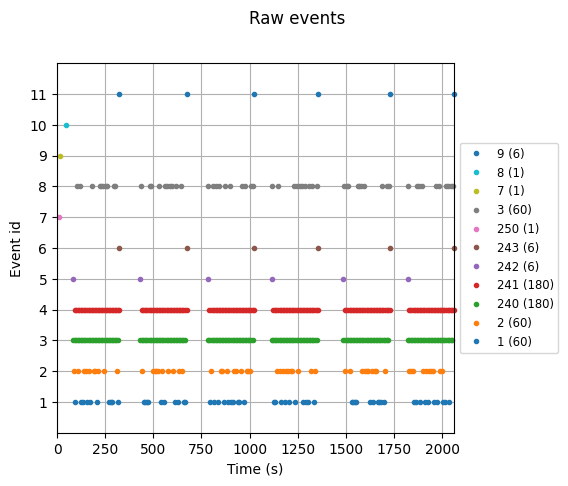

In [5]:
lrd = LoadRawData(selected_file_info)
lrd

### Collect epochs

Filtered events (num): 180, event_id: {'1': 1, '2': 2, '3': 8}

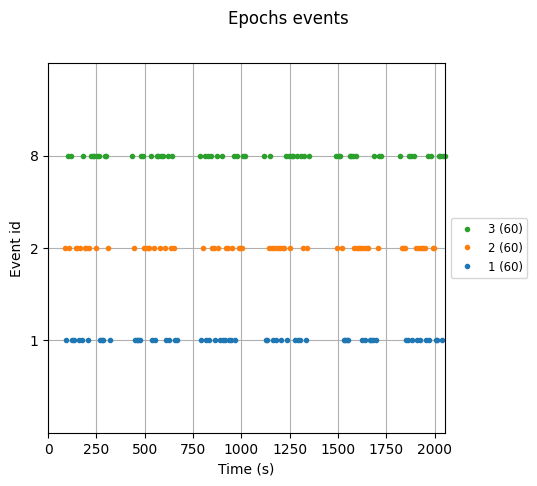

In [6]:
event_id = {k: v for k, v in lrd.event_id.items() if k in event_id_of_interest }
_events = [v for _, v in event_id.items()]
events = [e for e in lrd.events if e[2] in _events]


fig = mne.viz.plot_events(
    events,
    sfreq=lrd.raw.info["sfreq"],
    event_id=event_id,
    show=False,
)
fig.suptitle("Epochs events")
fig.savefig(lrd.to_cache("epochs-events.jpg"))

print(f'Filtered events (num): {len(events)}, event_id: {event_id}')

In [7]:
epochs = mne.Epochs(lrd.raw, events=events, event_id=event_id, picks=lrd.ch_names_inside_montage, **epochs_kwargs)
epochs

Not setting metadata
180 matching events found
Setting baseline interval to [0.0, 5.0] s
Applying baseline correction (mode: mean)
0 projection items activated


Number of events,180
Events,1: 602: 603: 60
Time range,0.000 – 5.000 s
Baseline,0.000 – 5.000 s


In [8]:
epochs.load_data()
epochs.filter(**filter_kwargs)
epochs

Loading data for 180 events and 5001 original time points ...
0 bad epochs dropped
Setting up band-pass filter from 1 - 40 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 40.00 Hz
- Upper transition bandwidth: 10.00 Hz (-6 dB cutoff frequency: 45.00 Hz)
- Filter length: 3301 samples (3.301 s)



[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  10 tasks      | elapsed:    1.0s
[Parallel(n_jobs=8)]: Done 520 tasks      | elapsed:    1.2s
[Parallel(n_jobs=8)]: Done 10164 tasks      | elapsed:    3.3s
[Parallel(n_jobs=8)]: Done 10620 out of 10620 | elapsed:    3.4s finished


Number of events,180
Events,1: 602: 603: 60
Time range,0.000 – 5.000 s
Baseline,0.000 – 5.000 s


In [9]:
epochs.decimate(**decim_kwargs)
epochs

C:\Users\zcc\AppData\Local\Temp\ipykernel_63748\2751869570.py:1: RuntimeWarning: The measurement information indicates a low-pass frequency of 40.0 Hz. The decim=10 parameter will result in a sampling frequency of 100.0 Hz, which can cause aliasing artifacts.
  epochs.decimate(**decim_kwargs)


Number of events,180
Events,1: 602: 603: 60
Time range,0.000 – 5.000 s
Baseline,0.000 – 5.000 s


### Analysis

#### Evoked waveform

Averaged evoked: [<Evoked | '1' (average, N=60), 0 – 5 s, baseline 0 – 5 s, 59 ch, ~302 kB>, <Evoked | '2' 
(average, N=60), 0 – 5 s, baseline 0 – 5 s, 59 ch, ~302 kB>, <Evoked | '3' (average, N=60), 0 – 5 s, baseline 0 – 5
s, 59 ch, ~302 kB>]

No projector specified for this dataset. Please consider the method self.add_proj.


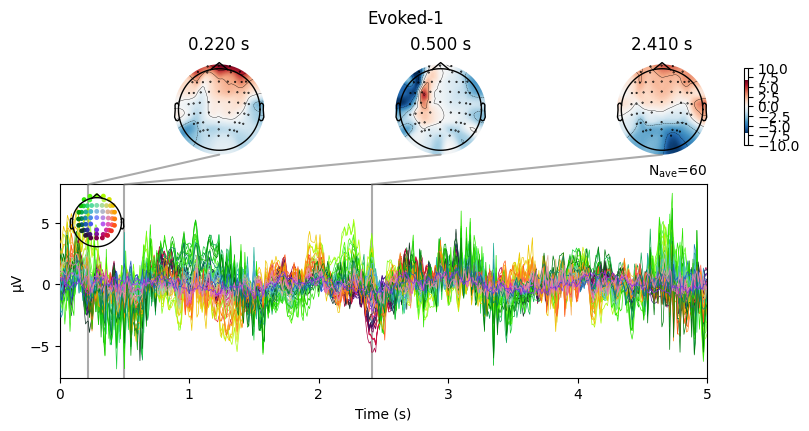

No projector specified for this dataset. Please consider the method self.add_proj.


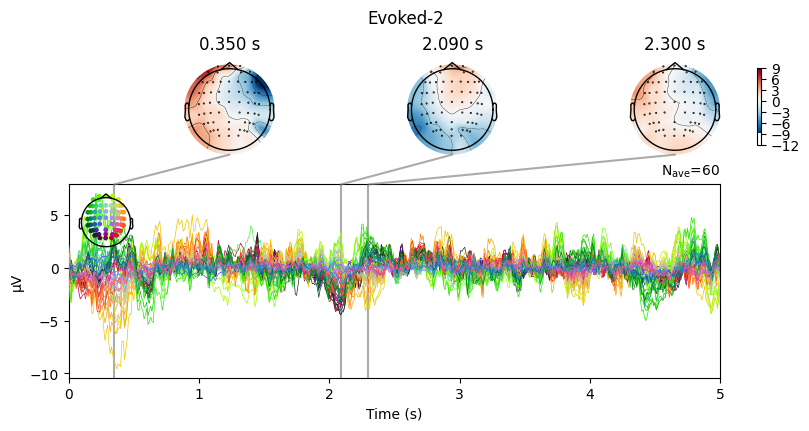

No projector specified for this dataset. Please consider the method self.add_proj.


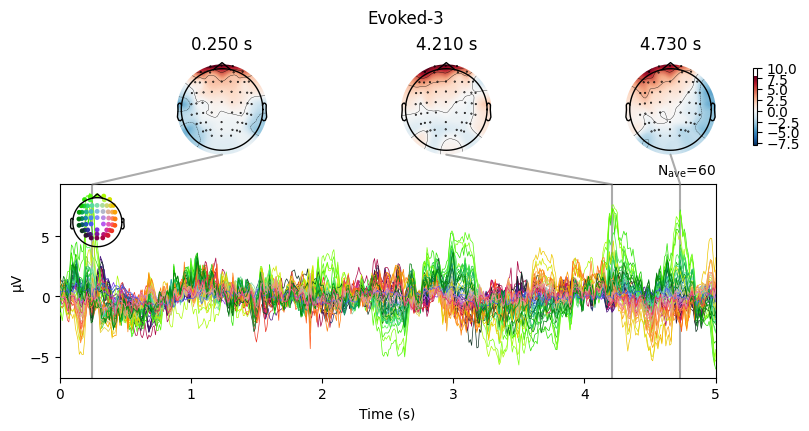

In [33]:
evoked = epochs.average(by_event_type=True)
print(f'Averaged evoked: {evoked}')

evo = evoked[0]
for evo in evoked:
    title = f'Evoked-{evo.comment}'
    fig = evo.plot_joint(title=title)
    fig.savefig(lrd.to_cache(f'{title}.jpg'))

#### TFR-morlet analysis

In [14]:
def compute_tfr_morlet(epochs, sensor_name: str, event_label: str, n_cycles: float=4.0, segments: int=16):
    epochs = epochs.copy().pick([sensor_name])[event_label]

    # Compute the min frequency the epochs support
    # Ref: https://mne.tools/stable/generated/mne.time_frequency.tfr_morlet.html#mne.time_frequency.tfr_morlet
    freq_min = np.ceil(
        (5 / np.pi) / (len(epochs.times) + 1) * n_cycles * epochs.info["sfreq"]
    )
    freq_max = np.max([freq_min * 2, epochs.info["lowpass"]])
    freqs = np.linspace(freq_min, freq_max, segments)

    tfr_epochs = mne.time_frequency.tfr_morlet(
        epochs, freqs, n_cycles=n_cycles, average=False, return_itc=False, n_jobs=n_jobs
    )
    times = epochs.times
    tfr_epochs.apply_baseline(baseline=(times[0], 0))
    data = tfr_epochs.data
    averaged_data = tfr_epochs.average().data.squeeze()

    return tfr_epochs, freqs, times, data, averaged_data

Not setting metadata
Applying baseline correction (mode: mean)
No baseline correction applied


[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done   1 out of   1 | elapsed:    0.0s finished


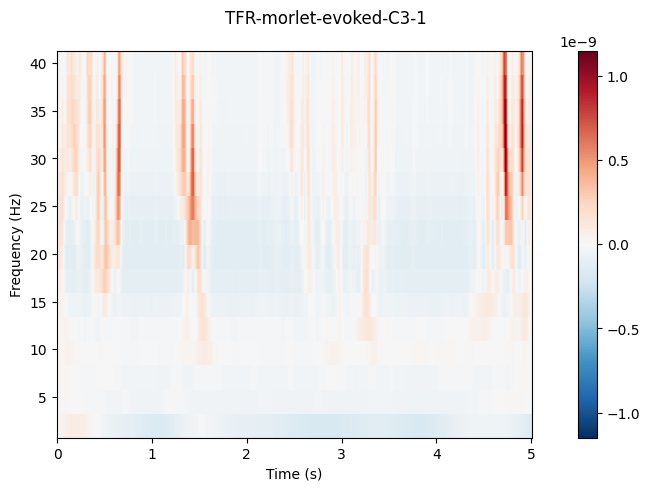

AttributeError: 'list' object has no attribute 'savefig'

In [34]:
for sensor_name in ch_name_of_interest:
    for event_label in event_id_of_interest:
        tfr_epochs, freqs, times, data, averaged_data = compute_tfr_morlet(epochs, sensor_name, event_label)
        evoked = tfr_epochs.average()
        title = f'TFR-morlet-evoked-{sensor_name}-{event_label}'
        fig = evoked.plot(title=title, show=True)[0]
        fig.savefig(lrd.to_cache(f'{title}.jpg'))

print(f'Computed tfr_epochs: {tfr_epochs}\n freqs: {freqs}\n times: {times}\n data shape: {data.shape}\n averaged_data shape: {averaged_data.shape}')


IndexError: list index out of range